# 2. 신경망 구성 요소

__감사말__

프랑소와 숄레의 [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) 2장에 사용된 코드에 대한 설명을 담고 있으며 텐서플로우 2.6 버전 이상에서 작성되었습니다. 소스코드를 공개한 저자에게 감사드립니다.

__구글 코랩 설정__

'런타임 -> 런타임 유형 변경' 메뉴에서 GPU를 지정한다.
TensorFlow 버전을 확인하려면 아래 명령문을 실행한다.

In [1]:
import tensorflow as tf
tf.__version__

'2.8.2'

TensorFlow가 GPU를 사용하는지 여부를 확인하려면 아래 명령문을 실행한다.
아래와 같은 결과가 나오면 GPU가 제대로 지원됨을 의미한다.

```
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
```

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**참고**

아래 코드에 대한 자세한 설명은
[신경망 구성 요소](https://codingalzi.github.io/dlp2/building_blocks_of_NN.html)를 
참고한다.

## 2.1. 신경망 모델 활용법 소개

**케라스로 MNIST 데이터셋 불러오기**

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

훈련셋 정보

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

테스트셋 정보

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**신경망 모델의 구조 지정**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**신경망 모델 컴파일**

In [11]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**이미지 데이터 전처리**

In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255   # 0과 1사이의 값
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255     # 0과 1사이의 값

**모델 훈련**

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 4ms/step - loss: 0.2606 - accuracy: 0.9242
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1046 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0685 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0501 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0382 - accuracy: 0.9887


**모델 활용: 예측하기**

In [14]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)

0번 이미지에 대한 예측값

In [15]:
predictions[0]

array([3.7156664e-10, 1.1247060e-11, 7.8418248e-07, 1.9143712e-04,
       1.6386665e-12, 5.4395425e-08, 8.4658936e-15, 9.9980754e-01,
       5.6272369e-09, 2.4767624e-07], dtype=float32)

가장 높은 확률값을 갖는 인덱스는 7.

In [16]:
predictions[0].argmax()

7

0번 이미지가 가리키는 숫자가 7일 확률이 99.98% 정도.

In [17]:
predictions[0][7]

0.99980754

실제로 첫째 이미지의 레이블이 7임.

In [18]:
test_labels[0]

7

**모델 성능 테스트**

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0652 - accuracy: 0.9812
test_acc: 0.9811999797821045


## 2.2 텐서

**넘파이 어레이와 텐서**

- 0차원(0D) 텐서

In [20]:
import numpy as np

x = np.array(12)
x

array(12)

텐서의 차원은 `ndim` 속성이 가리킨다.

In [21]:
x.ndim

0

- 1차원(1D) 텐서

In [22]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [23]:
x.ndim

1

- 2차원(2D) 텐서

In [24]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [25]:
x.ndim

2

- 3차원(3D) 텐서

In [26]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

In [27]:
x.ndim

3

**텐서 주요 속성**

MNIST 훈련 세트를 대상으로 언급된 속성을 확인해보자.
앞서 모양을 변형하였기에 다시 원본 데이터를 불러온다.

In [28]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

- `ndim` 속성

In [29]:
train_images.ndim

3

- `shape` 속성

In [30]:
train_images.shape

(60000, 28, 28)

- `dtype` 속성

In [31]:
train_images.dtype

dtype('uint8')

**텐서 활용**

*인덱싱*

훈련 세트에 포함된 이미지 중에서 4번 인덱스의 이미지, 즉 다섯 번째 이미지를 직접 확인해보자.
이를 위해 pyplot 모듈의 `imshow()` 함수를 이용한다.

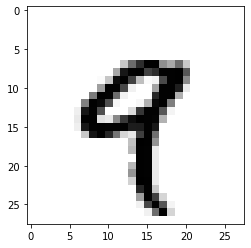

In [32]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

다섯 번째(4번 인덱스) 이미지는 실제로 숫자 9를 가리킨다.

In [33]:
train_labels[4]

9

*슬라이싱*

케라스를 포함하여 대부분의 딥러닝 모델은 훈련 세트 전체를 한꺼번에 처리하지 않고
지정된 크기(`batch_size`)의 배치로 나주어 처리한다. 
앞서 살펴본 모델의 배치 크기는 128이었다.

- 첫째 배치

In [34]:
batch = train_images[:128]

- 둘째 배치

In [35]:
batch = train_images[128:256]

- n 번째 배치

```python
batch = train_images[128 * n:128 * (n + 1)]
```

## 2.3 텐서 연산

**항목별 연산과 브로드캐스팅**

*항목별 연산*

항목별 덧셈을 직접 구현한다.

In [36]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

*브로드캐스팅*

아래 코드는 2D 텐서와 1D 텐서의 합이 이루어지는 과정을 보여준다.

In [37]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [38]:
y

array([0.21775017, 0.11679697, 0.80962022, 0.61510919, 0.20206574,
       0.92741228, 0.04852146, 0.31229721, 0.60159824, 0.43045755])

`(10,)` 모양의 1D 텐서 `y`를 0번 축을 추가하여 `(1, 10)` 모양의 2D 텐서 `y2`로 변환한다.

In [39]:
y2 = np.expand_dims(y, axis=0)
y2

array([[0.21775017, 0.11679697, 0.80962022, 0.61510919, 0.20206574,
        0.92741228, 0.04852146, 0.31229721, 0.60159824, 0.43045755]])

이제 `y2`를 32번 복제하여 `(32, 10)` 모양의 2D 텐서 `Y`로 변환한 후 항목별 덧셈을 실행한다.

In [40]:
Y = np.concatenate([y2] * 32, axis=0)

In [41]:
Y.shape

(32, 10)

In [42]:
((X + y) == (X + Y)).all()

True

**유니버설 함수**

`relu()` 함수를 직접 구현한다.

In [43]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

넘파이의 경우 항목별 연산을 병렬처리가 가능하며
매우 효율적으로 작동하는 저수준 언어로 구현되어 있다.
아래 두 코드는 넘파이를 활용할 때와 그렇지 않을 때의 
처리속도의 차이를 잘 보여준다.

In [44]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print(f"Took: {time.time() - t0:.2f}초")

Took: 0.01초


In [45]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print(f"Took: {time.time() - t0:.2f}초")

Took: 2.50초


**텐서 곱**

텐서의 점 곱(dot product)은 차원에 따라 다른 계산을 수행한다. 

- 두 벡터의 점곱

In [46]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
z

7.8196527912271465

직접 구현하면 다음과 같다.

In [47]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [48]:
naive_vector_dot(x, y)

7.8196527912271465

- 2D 텐서와 벡터의 점곱 (방식 1)

In [49]:
x = np.random.random((2,3))
y = np.random.random((3,))
z = np.dot(x, y)
z

array([0.78730048, 0.92396146])

In [50]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [51]:
naive_matrix_vector_dot(x, y)

array([0.78730048, 0.92396146])

- 2D 텐서와 벡터의 점곱 (방식 2)

In [52]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [53]:
naive_matrix_vector_dot(x, y)

array([0.78730048, 0.92396146])

- 2D 텐서와 2D 텐서의 점곱 (행렬의 곱)

In [54]:
x = np.random.random((2,3))
y = np.random.random((3,4))
z = np.dot(x, y)
z

array([[0.4341276 , 0.5517182 , 0.98989336, 0.47125827],
       [0.52459489, 0.69052699, 1.01505076, 0.79129306]])

In [55]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

In [56]:
naive_matrix_dot(x, y)

array([[0.4341276 , 0.5517182 , 0.98989336, 0.47125827],
       [0.52459489, 0.69052699, 1.01505076, 0.79129306]])

**텐서 모양 변형**

- `reshape()` 메서드: `reshape()` 메서드는
텐서에 포함된 항목의 개수는 변하지 않으면서
원하는 모양의 텐서를 생성한다.
아래 코드는 텐서의 모양 변환을 설명하는 간단한 예제를 보여준다.

In [57]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [58]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

- `transpose()` 메서드: 행렬(2D 텐서)의 행과 열을 서로 바꾼
    **전치 행렬**을 반환한다.

In [59]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

## 2.4 신경망 모델 훈련 과정

**그레이디언트 테이프**

`tf.GradientTape` 클래스를 이용하여 함수의 그레이디언드를 계산하려면
함수의 변수를 `tf.Variable` 클래스의 인스턴스로 선언해야 한다.

여기서는 `tf.GradientTape`의 기본 사용법만 간단한 예제를 이용하여 보여준다.
텐서 함수의 그레이디언트 계산법에 대한 자세한 설명은[Matt Mazur의 A Step by Step Backpropagation Example](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)에서
확인할 수 있다.

*경우 1) 하나의 변수에 대한 그레이디언트*

In [60]:
import tensorflow as tf

x = tf.Variable(0.)

with tf.GradientTape() as tape:
    y = x**2 + 2*x + 3

grad_of_y_wrt_x = tape.gradient(y, x)

`y`를 `x`의 함수로 표현하면 다음과 같다.

$$
y = f(x) = x^2 + 2x + 3
$$

텐서 `x`에 대한 그레이디언트는 다음과 같다.

$$
\nabla f(x) = \frac{d f}{d x} = 2x + 2
$$

따라서 `x`가 0일 때의 미분값은 2이다.

In [61]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

*경우 2) 임의의 텐서 연산에 대한 그레이디언트*

In [62]:
x = tf.Variable(tf.random.uniform((2, 2)))

with tf.GradientTape() as tape:
    y = x**2 + 3

grad_of_y_wrt_x = tape.gradient(y, x)

변수 `x`의 모양은 다음과 같다.

$$
x = 
\begin{bmatrix}
x_{11} & x_{12} \\
x_{21} & x_{22}
\end{bmatrix}
$$

`y`를 `x`의 함수로 표현하면 다음과 같다.

$$
y = f(x) = x^2 + 3 = 
\begin{bmatrix}
x_{11}^2 + 3 & x_{12}^2 + 3 \\
x_{21}^2 + 3 & x_{22}^2 + 3
\end{bmatrix}
$$

텐서 `x`에 대한 그레이디언트는 다음과 같다.

$$
\nabla f(x) = 
\begin{bmatrix}
2 x_{11} & 2 x_{12} \\
2 x_{21} & 2 x_{22}
\end{bmatrix}
$$

In [63]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.85849875, 0.6813104 ],
       [0.3946874 , 0.8764396 ]], dtype=float32)>

In [64]:
x

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.4292494, 0.3406552],
       [0.1973437, 0.4382198]], dtype=float32)>

*경우 3) 변수들의 리스트에 대한 그레이언트*

In [65]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))

with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b

grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

텐서 `x`와 변수 `W`, `b`의 모양은 다음과 같다.

$$
x = 
\begin{bmatrix}
x_{11} & x_{12} \\
x_{21} & x_{22}
\end{bmatrix},
\qquad
W = 
\begin{bmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22}
\end{bmatrix},
\qquad
b = 
\begin{bmatrix}
b_{1} & b_{2}
\end{bmatrix}
$$

`y`를 `W`와 `b`의 함수로 표현하면 다음과 같다.

$$
y = f(W, b) = x\cdot W + b = 
\begin{bmatrix}
x_{11}\cdot w_{11} + x_{12}\cdot w_{21} + b_1 & x_{11}\cdot w_{12} + x_{12}\cdot w_{22} + b_2 \\
x_{21}\cdot w_{11} + x_{22}\cdot w_{21} + b_1 & x_{21}\cdot w_{12} + x_{22}\cdot w_{22} + b_2 \\
\end{bmatrix}
$$

텐서 `x`에 대한 그레이디언트는 다음과 같다.

$$
\nabla f(W, b) = 
\begin{bmatrix}
    \begin{bmatrix}
    x_{11} + x_{21} & x_{11} + x_{21} \\
    x_{12} + x_{22} & x_{12} + x_{22}
    \end{bmatrix}, 
    \begin{bmatrix}
    2 & 2
    \end{bmatrix}    
\end{bmatrix}
$$

In [66]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.7016602 , 1.7016602 ],
        [0.33325195, 0.33325195]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

In [67]:
x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.9174601 , 0.16163337],
       [0.7844081 , 0.17168295]], dtype=float32)>